# 학습 관련 기술들

## 확률적 경사 하강법(SGD)

In [1]:
class SGD :
    def __init__(self, lr = 0.01) :
        self.lr = lr
    
    def update(self, params, grads) :
        for key in params.keys():
            params[key] -=self.lr*grads[key]

## 모멘텀

In [ ]:
class Momentum :
    def __init__(self, lr=0.01, momentum = 0.9) :
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads) :
        if self.v is None :
            self.v = {}
            for key, val in params.items() :
                self.v[key] = np.zeros_like(val)
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params[key] += self.v[key]

## 가중치의 초깃값

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x) :
    return 1/ (1+ np.exp(-x))

# 입력데이터
x = np.random.randn(1000, 100)
# 각 층 뉴런
node_num = 100
# 은닉층
hidden_layer_size = 5
# 활성화 값
activations = {}

for i in range(hidden_layer_size) :
    if i != 0 :
        x = activations[i-1]
    # acrivation 0번 인덱스에 x 값 
    w = np.random.randn(node_num, node_num) * 0.01
    # w값 100개 만들기
    a = np.dot(x,w)
    # 매개변수와 입력데이터 계산
    z = sigmoid(a)
    # 활성화함수로 sigmoid 적용
    activations[i] = z
    # 결과값 activation 1번 값으로

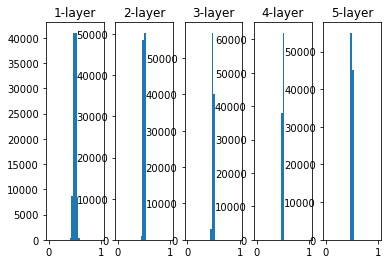

In [14]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

### 자비에 초깃값

In [15]:
def sigmoid(x) :
    return 1/ (1+ np.exp(-x))

# 입력데이터
x = np.random.randn(1000, 100)
# 각 층 뉴런
node_num = 100
# 은닉층
hidden_layer_size = 5
# 활성화 값
activations = {}

for i in range(hidden_layer_size) :
    if i != 0 :
        x = activations[i-1]
    # acrivation 0번 인덱스에 x 값 
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    # w값 100개 만들기, 자비에 초깃값 사용
    a = np.dot(x,w)
    # 매개변수와 입력데이터 계산
    z = sigmoid(a)
    # 활성화함수로 sigmoid 적용
    activations[i] = z
    # 결과값 activation 1번 값으로

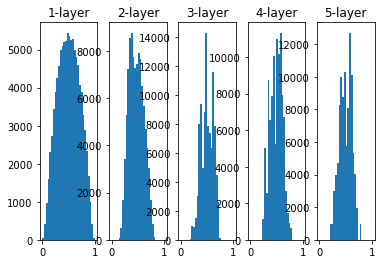

In [16]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

## Dropout

In [17]:
class dropout :
    def __init__(self, dropout_ratio = 0.5) :
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_fig = True) :
        if train_fig :
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else :
            return x * (1.0 - self.dropout_ratio)
    def backward(self, dout) :
        return dout * self.mask
    

In [39]:
x = np.array([1,3,1,2,1])
a = np.random.rand(*x.shape) > 0.5
a

array([ True,  True,  True, False,  True])

In [40]:
(a) * x

array([1, 3, 1, 0, 1])

In [20]:
np.random.rand(5)

array([0.36728065, 0.88799615, 0.77771525, 0.43747981, 0.9477445 ])

In [25]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra